## Importation des bibliothéques necessaires

In [119]:
import math
import random
import matplotlib.pyplot as plt #pour la visualization des graphes
import numpy as np #linear algebra
import pandas as pd # pour la manipulation du data (dataframe)
from sklearn.model_selection import train_test_split  #pour l'entrainement du model
from datetime import datetime
import seaborn as sns # Seaborn est une bibliothèque de visualisation de données en Python basée sur matplotlib.
sns.set(style="darkgrid")
from statsmodels.tsa.seasonal import seasonal_decompose # Importe à nouveau la fonction 'seasonal_decompose' de statsmodels.
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split # Importe la fonction 'train_test_split' utilisée pour diviser les données en ensembles d'entraînement et de test.
from sklearn.linear_model import LinearRegression # Importe le modèle de régression linéaire.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Importe les modèles de régression basés sur des ensembles d'arbres de décision.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Importe les fonctions 'mean_squared_error' et 'r2_score', utilisées pour évaluer la performance des modèles de régression.
from sklearn.model_selection import cross_val_score # Importe la fonction 'cross_val_score', utilisée pour évaluer la performance d'un modèle via une validation croisée.



#1.Collecte de Données : Compiler un ensemble de données à partir de sources fiables

Il s'agit de l'ensemble de données de l'article Deciphering Environmental Air Pollution with Large Scale City Data publié dans IJCAI 2022 dans AI for Good Track. Il a reçu le prix du meilleur article dans la catégorie.


L'ensemble de données présente un ensemble de données spatio-temporelles à grande échelle impliquant tous les principaux acteurs de la pollution atmosphérique urbaine. L'ensemble de données combine plusieurs sources pour obtenir les informations essentielles à l'étude de la pollution atmosphérique urbaine : **les polluants eux-mêmes, le trafic urbain, la pollution due aux industries de production d'électricité et les facteurs météorologiques** . Toutes ces fonctionnalités sont collectées et organisées quotidiennement dans plus de 50 villes aux États-Unis sur une période de 2 ans.

---



#### Rsources:

[Kaggle](https://www.kaggle.com/datasets/mayukh18/deap-deciphering-environmental-air-pollution/data) |
[Github](https://github.com/mayukh18/DEAP)

In [57]:
data= pd.read_csv("/content/pollution_data.csv") #lire la base de donne
data

Date           City      County State Population Staying at Home  \
0      2019-01-01    albuquerque  bernalillo    NM                   1,77,171   
1      2019-01-01        atlanta      fulton    GA                   2,83,093   
2      2019-01-01         austin      travis    TX                   2,68,732   
3      2019-01-01      baltimore     baltimo    MD                   1,91,486   
4      2019-01-01          boise         ada    ID                   1,05,237   
...           ...            ...         ...   ...                        ...   
35591  2020-12-11        seattle        king    WA                   7,33,494   
35592  2020-12-11    springfield    sangamon    IL                     60,167   
35593  2020-12-11  staten island    richmond    NY                   1,59,253   
35594  2020-12-11    tallahassee        leon    FL                     76,894   
35595  2020-12-11         tucson        pima    AZ                   3,17,121   

      Population Not Staying at Home  mil_miles  past_week_avg_miles  \
0                           4,99,456  19.038463                  0.0   
1                           7,63,811  29.295609                  0.0   
2                           9,76,194  27.286079                  0.0   
3                           4,09,167  12.961132                  0.0   
4                           3,63,293  12.640954                  0.0   
...                              ...        ...                  ...   
35591                      14,99,669  50.982852                  0.0   
35592                       1,35,181   6.221078                  0.0   
35593                       3,16,926  14.491843                  0.0   
35594                       2,15,608   8.184401                  0.0   
35595                       7,21,952  31.191188                  0.0   

        latitude   longitude  ...  pm10_max  pm10_median  pm10_variance  \
0      35.107209 -106.617209  ...     127.0         18.0        5303.29   
1      33.760109  -84.402826  ...      27.0         14.0         280.83   
2      30.283333  -97.750641  ...       NaN          NaN            NaN   
3      39.305833  -76.610417  ...      15.0          6.0          74.76   
4      43.604545 -116.202424  ...      20.0          5.0         170.86   
...          ...         ...  ...       ...          ...            ...   
35591  47.590794 -122.325714  ...       NaN          NaN            NaN   
35592  39.783158  -89.641842  ...       NaN          NaN            NaN   
35593  40.588571  -74.150000  ...       NaN          NaN            NaN   
35594  30.456000  -84.262500  ...       NaN          NaN            NaN   
35595  32.217037 -110.949815  ...      55.0         27.0        1950.18   

       pm10_count  wind-gust_min  wind-gust_max  wind-gust_median  \
0            48.0            0.3           27.3               3.8   
1            23.0            0.1            4.5               1.7   
2             NaN            0.2           14.0               6.8   
3            24.0            0.1           24.0               8.5   
4            47.0            0.1           11.3               2.2   
...           ...            ...            ...               ...   
35591         NaN            0.2           17.7               4.5   
35592         NaN            1.2           15.3               4.5   
35593         NaN            0.2           11.5               6.2   
35594         NaN            4.5           15.1               8.3   
35595       189.0            0.1            8.0               3.0   

       wind-gust_variance  wind-gust_count    pp_feat  
0                  839.84             54.0   0.319492  
1                   12.11             44.0  23.304216  
2                  162.34             67.0  14.333042  
3                  355.46             70.0   6.403240  
4                   46.19             92.0   0.000000  
...                   ...              ...        ...  
35591              161.93            182.0   0.000000

#2. Analyse Exploratoire des Données (AED) :

In [59]:
data.info() #information sur les données ( les columns, type et nombre de valeurs manquantes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35596 entries, 0 to 35595
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            35596 non-null  object 
 1   City                            35596 non-null  object 
 2   County                          35596 non-null  object 
 3   State                           35596 non-null  object 
 4   Population Staying at Home      35596 non-null  object 
 5   Population Not Staying at Home  35596 non-null  object 
 6   mil_miles                       35596 non-null  float64
 7   past_week_avg_miles             35596 non-null  float64
 8   latitude                        35596 non-null  float64
 9   longitude                       35596 non-null  float64
 10  o3_min                          33950 non-null  float64
 11  o3_max                          33950 non-null  float64
 12  o3_median                       

In [60]:
data.isnull().sum()
# Calcule et retourne le nombre de valeurs manquantes dans chaque colonne

Date                             0
City                             0
County                           0
State                            0
Population Staying at Home       0
                              ... 
wind-gust_max                 1379
wind-gust_median              1379
wind-gust_variance            1379
wind-gust_count               1379
pp_feat                          0
Length: 71, dtype: int64

<Axes: >

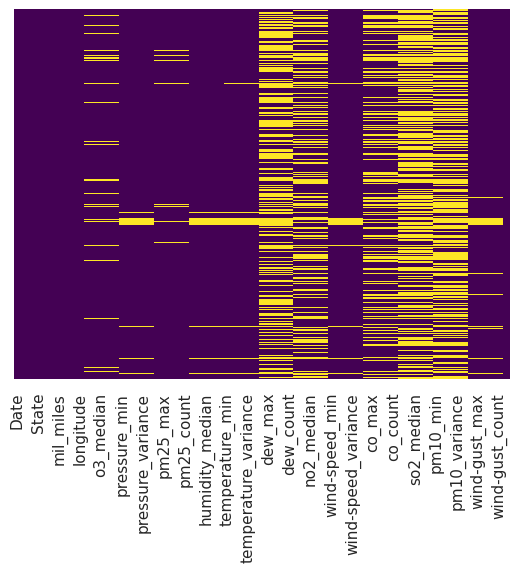

In [61]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
data.columns

Index(['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_med

In [63]:
# Calcul des statistiques descriptives pour les colonnes numériques du DataFrame 'data'
data.describe()

mil_miles  past_week_avg_miles      latitude     longitude  \
count  35596.000000              35596.0  35596.000000  35596.000000   
mean      46.856694                  0.0     37.094422    -97.172019   
std       52.963897                  0.0      5.230635     18.310666   
min        1.461991                  0.0     21.304651   -157.843488   
25%       17.931973                  0.0     33.502593   -112.070988   
50%       31.174508                  0.0     37.549032    -93.103947   
75%       52.377897                  0.0     40.724364    -82.979783   
max      443.915641                  0.0     47.590794    -71.062051   

             o3_min        o3_max     o3_median    o3_variance      o3_count  \
count  33950.000000  33950.000000  33950.000000   33950.000000  33950.000000   
mean       6.347216     41.418074     22.175976    6902.829271     74.791517   
std        8.571965     57.404942     28.127937   53155.246079     52.517788   
min        0.100000      0.100000      0.100000       0.000000      2.000000   
25%        0.800000     25.600000     14.500000     233.375000     24.000000   
50%        4.000000     33.600000     20.800000     563.080000     66.000000   
75%        9.600000     42.400000     27.200000    1191.895000    104.000000   
max      500.000000    500.000000    500.000000  612542.000000    216.000000   

       pressure_min  ...      pm10_max   pm10_median  pm10_variance  \
count  34667.000000  ...  16965.000000  16965.000000   1.696500e+04   
mean     949.846006  ...     55.385028     17.666490   3.872913e+03   
std      220.722048  ...     90.403915     10.997532   3.369546e+04   
min        0.000000  ...      2.000000      1.000000   0.000000e+00   
25%     1003.200000  ...     23.000000     10.000000   1.563600e+02   
50%     1009.700000  ...     36.000000     15.000000   4.221200e+02   
75%     1014.200000  ...     58.000000     21.000000   1.164700e+03   
max     1118.000000  ...    999.000000    164.000000   1.003710e+06   

         pm10_count  wind-gust_min  wind-gust_max  wind-gust_median  \
count  16965.000000   34217.000000   34217.000000      34217.000000   
mean      76.844916       0.666110      14.475015          5.336239   
std       60.742441       1.647992       7.953625          3.185103   
min        2.000000       0.100000       0.100000          0.100000   
25%       24.000000       0.100000       9.700000          3.000000   
50%       48.000000       0.200000      13.000000          4.600000   
75%      114.000000       0.400000      17.500000          7.000000   
max      216.000000      36.000000     327.000000         94.000000   

       wind-gust_variance  wind-gust_count       pp_feat  
count        34217.000000     34217.000000  35596.000000  
mean           154.271994        81.158225      8.435058  
std            389.347015        54.236630     24.625900  
min              0.000000         2.000000      0.000000  
25%             59.660000        43.000000      0.338402  
50%            106.340000        66.000000      1.771250  
75%            181.020000       111.000000      6.111875  
max          26644.700000       329.000000    304.387974  

[8 rows x 65 columns]

In [64]:
pollutants= data[['pm25_median','pm10_median','no2_median','co_median','so2_median','o3_median']]

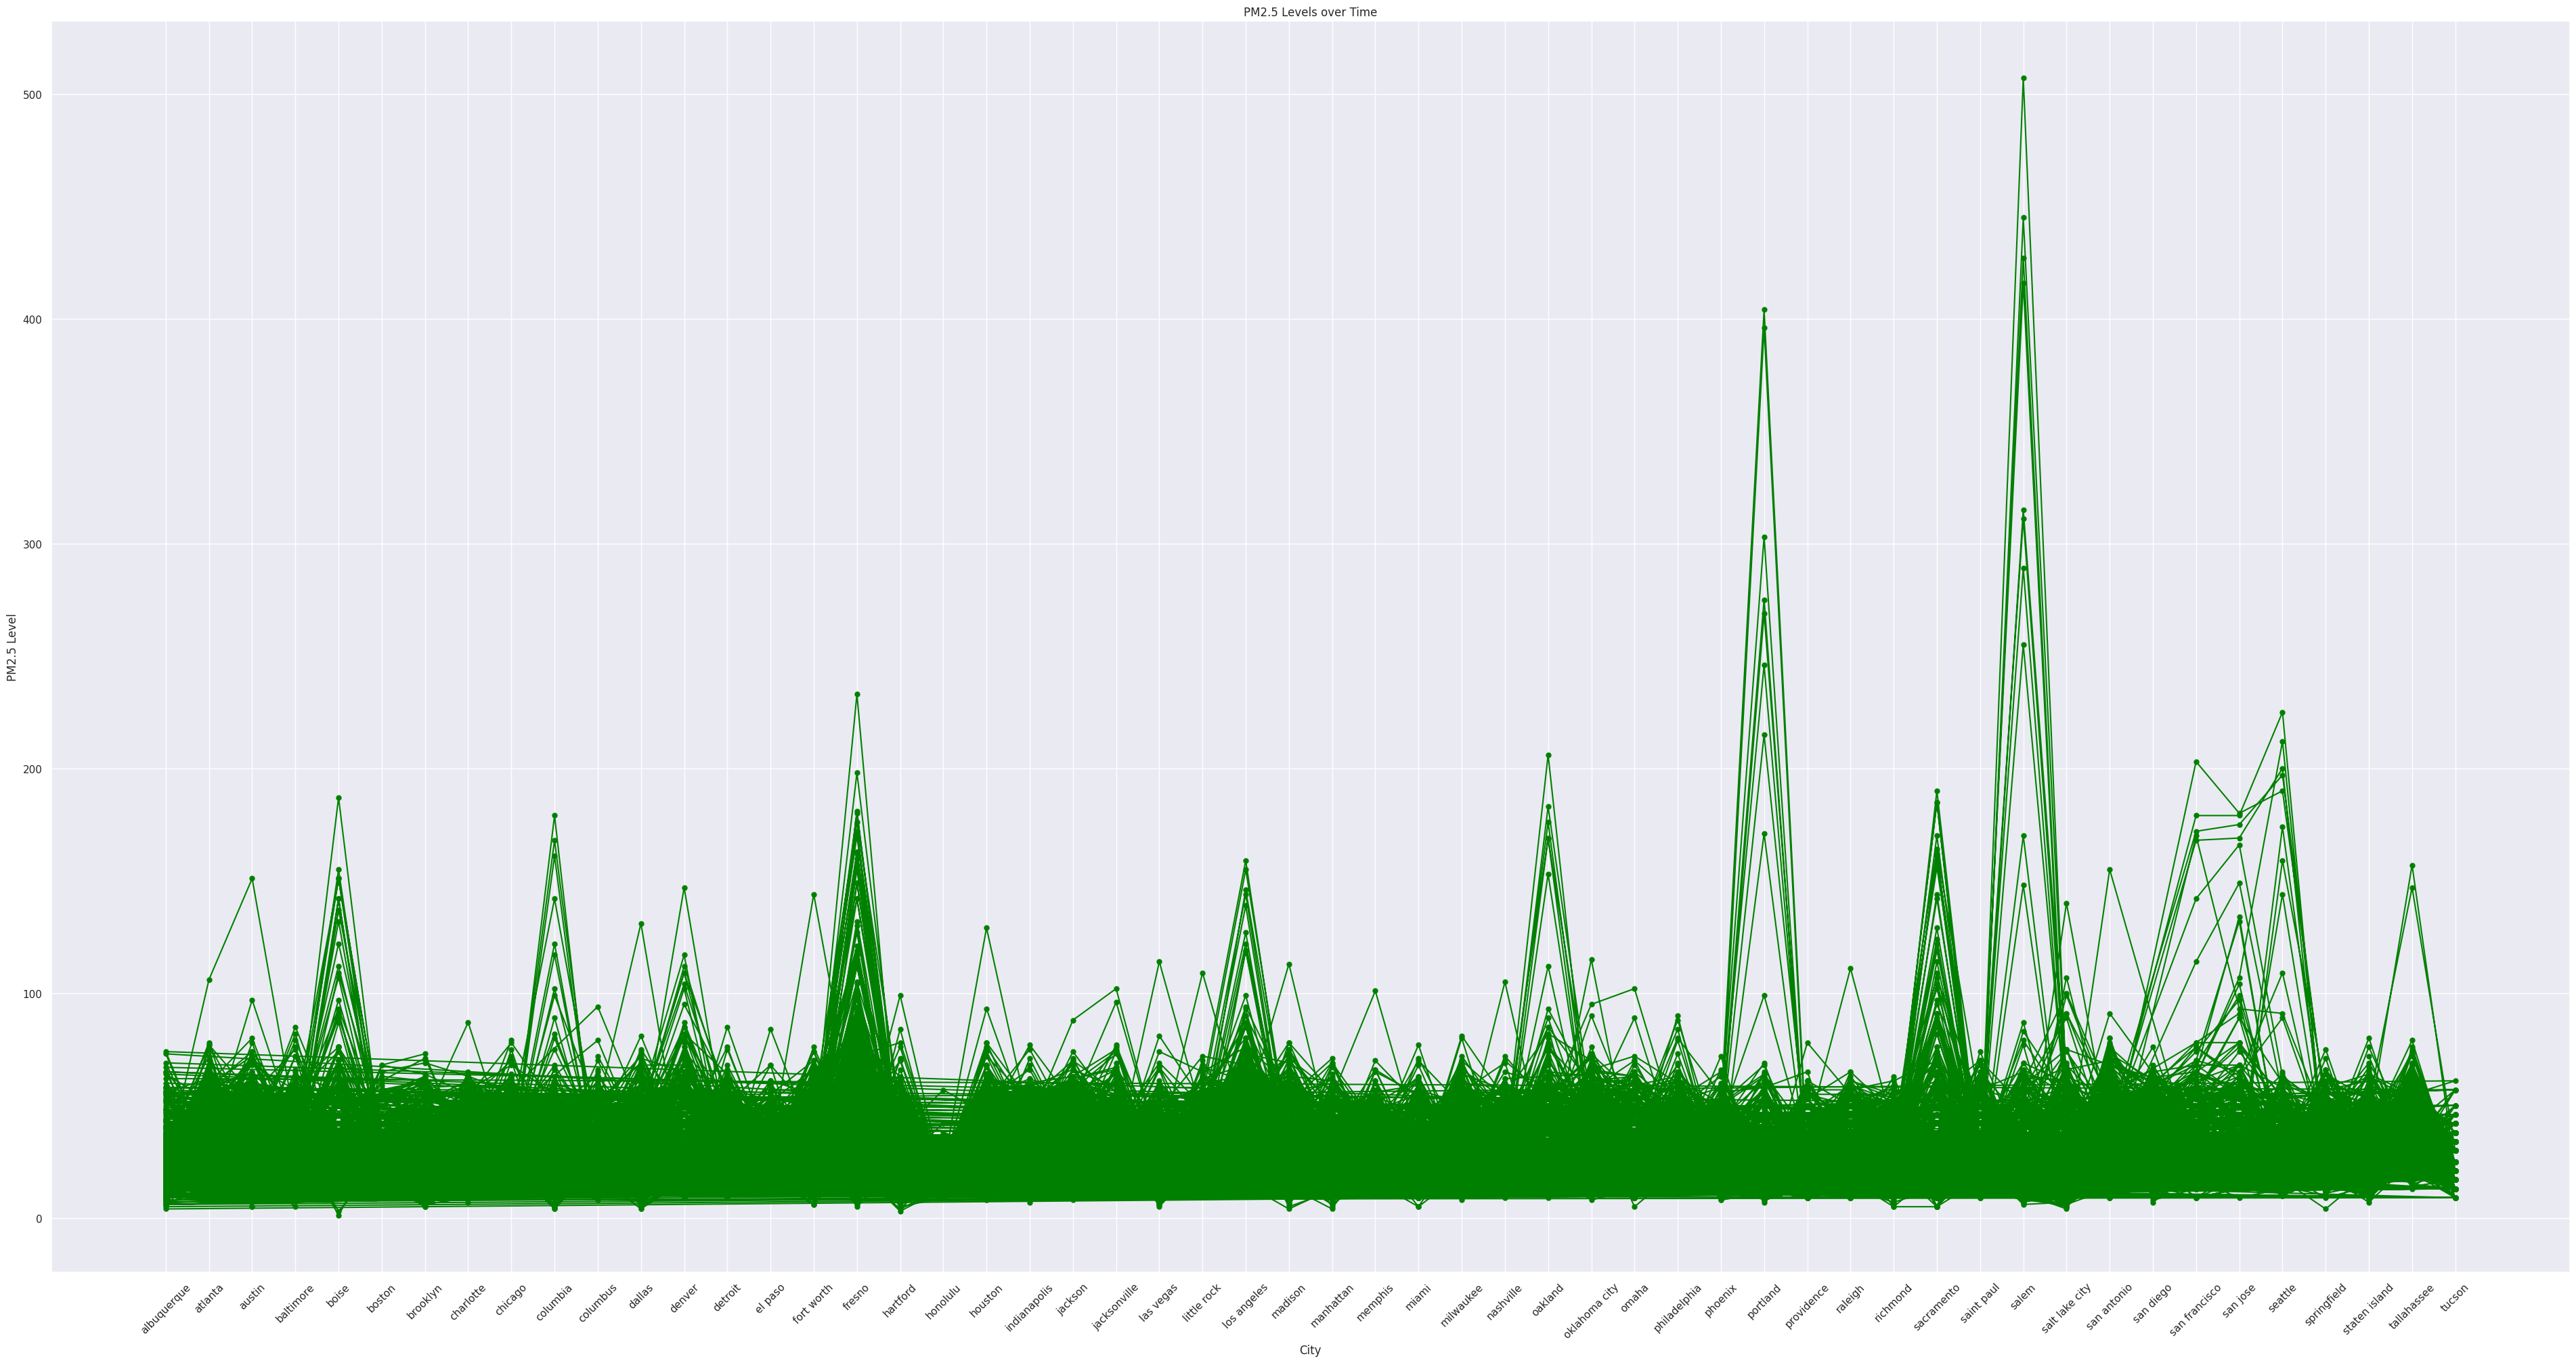

In [65]:
plt.figure(figsize=(48, 24))  # Création d'une figure avec une dimension spécifique.

plt.plot(data['City'], data['pm25_median'], color='green', marker='o', markersize=5, linestyle='-')
# Trace un graphique en ligne des niveaux de PM2.5 par ville.
# 'data['City']' sur l'axe des x et 'data['pm25_median']' sur l'axe des y.
# La ligne est verte avec des marqueurs en forme de cercle de taille 5.

plt.xlabel('City')  # Définit le label de l'axe des x.

plt.ylabel('PM2.5 Level')  # Définit le label de l'axe des y.

plt.title('PM2.5 Levels over Time')  # Ajoute un titre au graphique.

plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x.
# Oriente les étiquettes de l'axe des x à 45 degrés pour une meilleure lisibilité.
plt.show()  # Affiche le graphique.


In [66]:
import plotly.express as px
# Plotly Express est une bibliothèque de visualisation de données interactive en Python.

px.scatter(data, x='Date', y='pm25_median', color='City')

In [67]:
px.scatter(data, x='Date', y='pm10_median', color='City')


In [68]:
# Ajoute une nouvelle colonne 'weekday' en convertissant la date en jour de la semaine (lundi=0, dimanche=6)
data['Weekday'] = data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday())

# Ajoute une nouvelle colonne 'Month' en convertissant la date en mois et en soustrayant 1 (janvier=0, décembre=11)
data['Month'] = data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month - 1)

# Ajoute une nouvelle colonne 'Year' en convertissant la date en année et en soustrayant 1
data['Year'] = data['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year - 1)


In [69]:
def detailed_plot(df, value):
    # Création d'une figure et de 4 subplots organisés en grille 2x2
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Calcul de la moyenne de la valeur 'value' groupée par Mois et Année
    d = pd.DataFrame(df.groupby(['Month', 'Year'])[value].mean()).reset_index()

    # Tracé de deux graphiques en ligne pour visualiser la moyenne par Année et par Mois
    sns.lineplot(data=d.pivot(index='Year', columns='Month', values=value), ax=ax[0][0])
    sns.lineplot(data=d.pivot(index='Month', columns='Year', values=value), ax=ax[0][1])

    # Configuration des titres pour les graphiques en ligne
    ax[0][0].set_title(f'Moyenne annuelle de {value}')
    ax[0][1].set_title(f'Moyenne mensuelle de {value}')

    # Tracé de deux histogrammes pour les moyennes annuelles et mensuelles
    df[[value, 'Year']].groupby('Year')[value].mean().plot(kind='bar', ax=ax[1][0])
    df[[value, 'Month']].groupby('Month')[value].mean().plot(kind='bar', ax=ax[1][1])

    # Configuration des titres pour les histogrammes
    ax[1][0].set_title(f'Moyenne annuelle de {value}')
    ax[1][1].set_title(f'Moyenne mensuelle de {value}')
    plt.savefig('pm25.png')  # Save the plot as a PNG file

    # Ajustement du layout pour éviter les chevauchements
    fig.tight_layout()


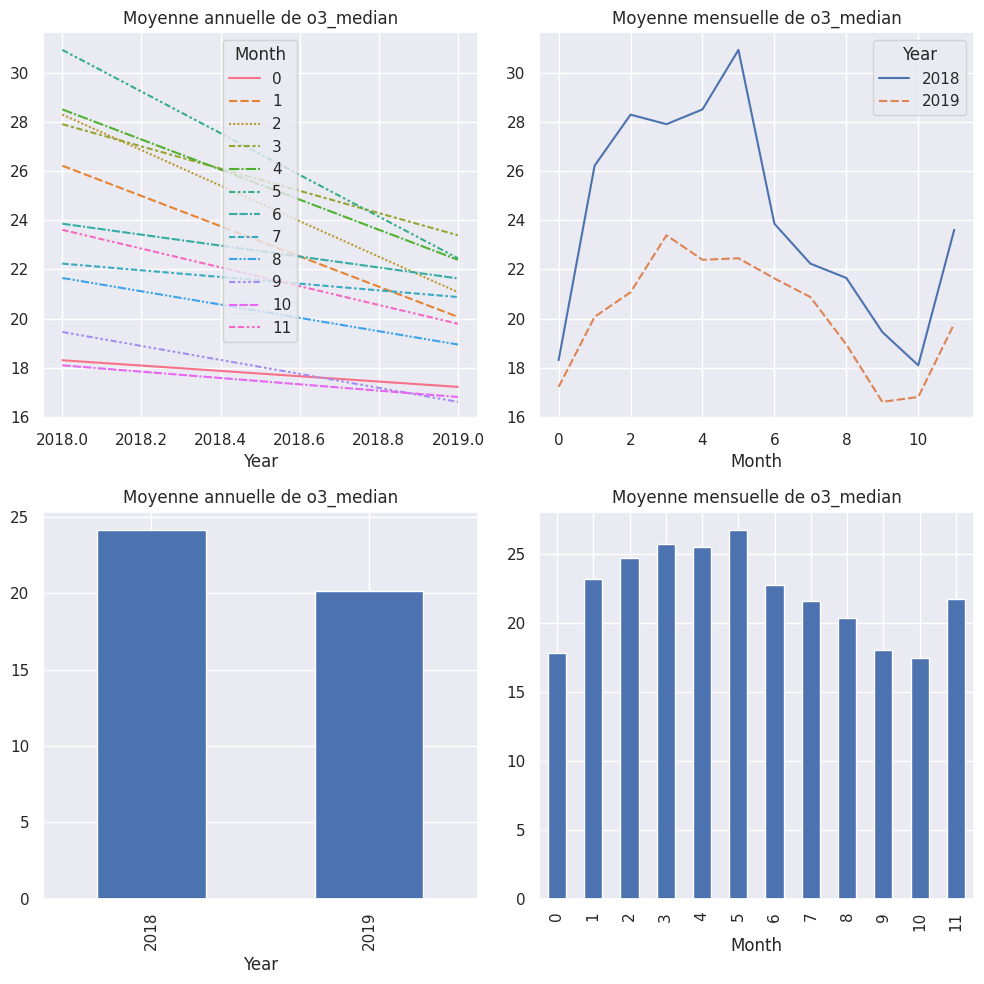

In [70]:
detailed_plot(data, 'o3_median')

Les graphiques indiquent une diminution générale des niveaux moyens annuels et mensuels d'ozone (O3) de 2018 à 2019, avec une tendance à la baisse particulièrement marquée pendant les mois d'été.

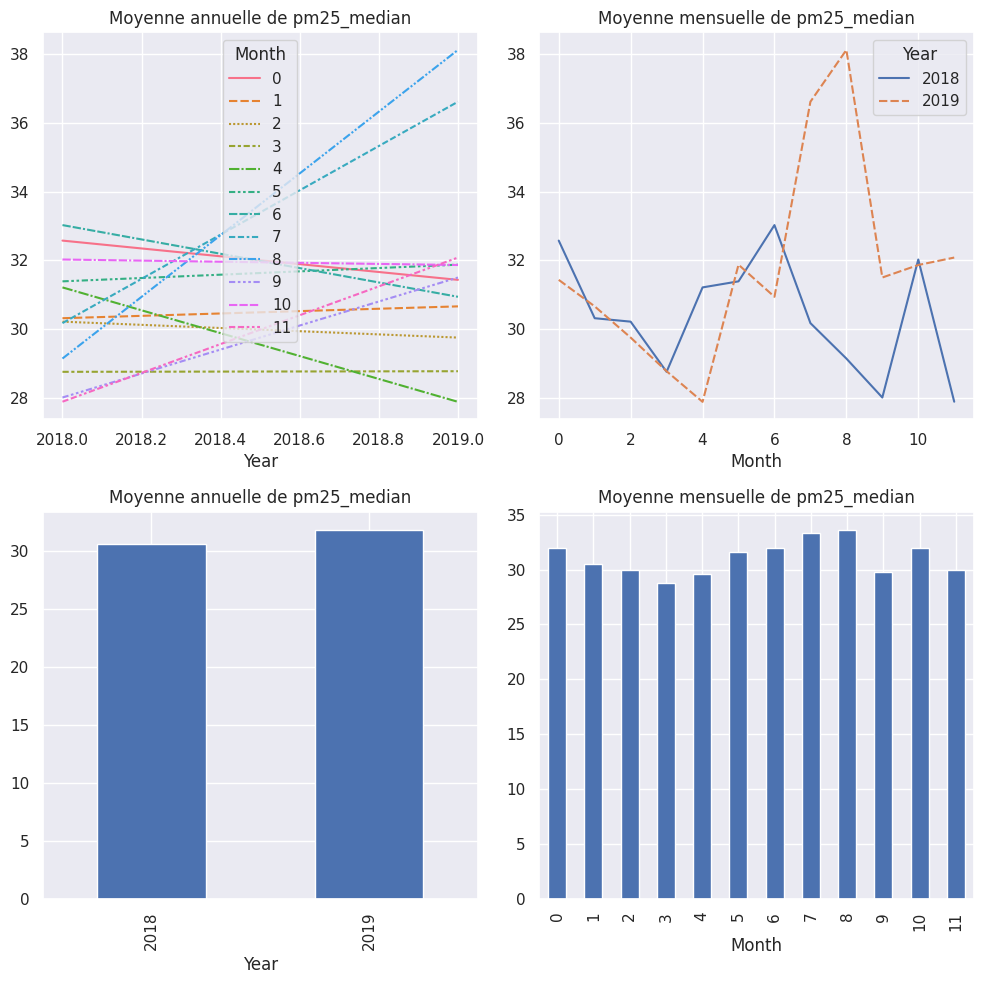

In [71]:
detailed_plot(data, 'pm25_median')

Les graphiques montrent une augmentation notable des niveaux moyens annuels de PM2.5 de 2018 à 2019, avec une variabilité mensuelle élevée en 2019, incluant une diminution significative en fin d'année.

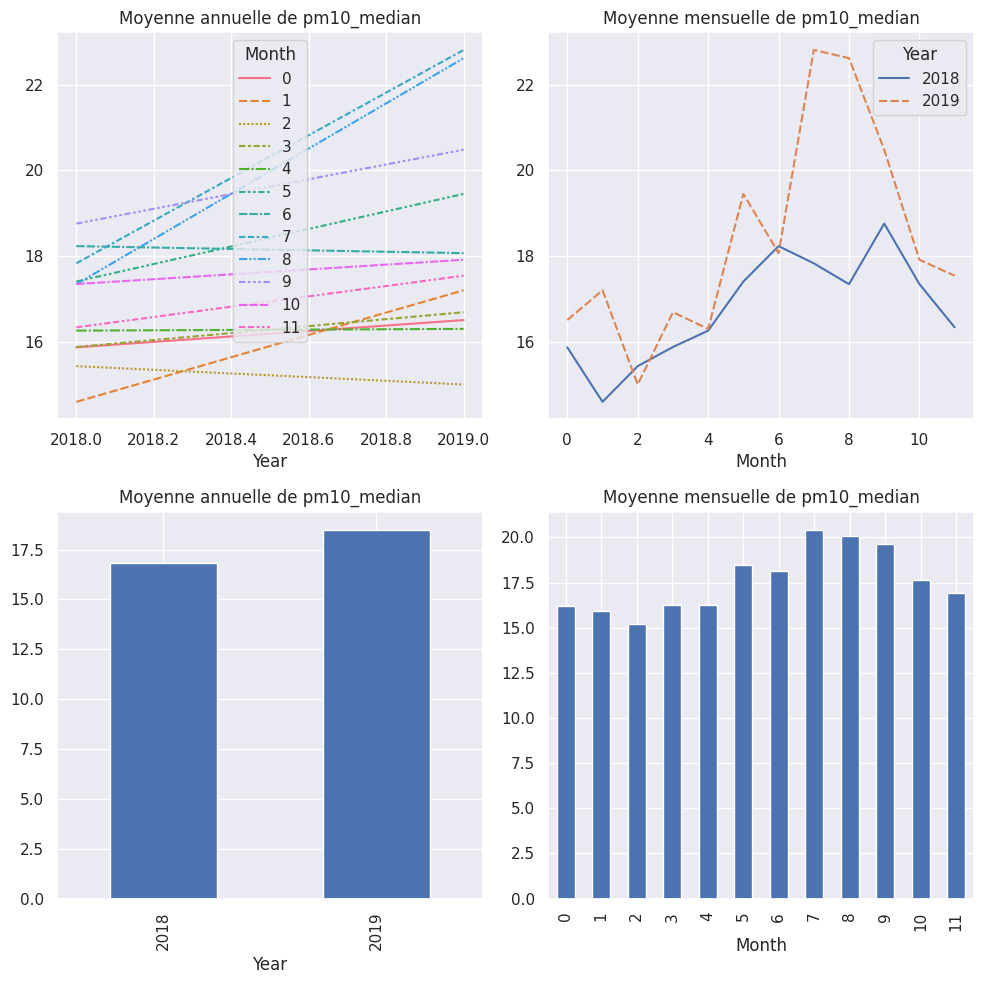

In [72]:
detailed_plot(data, 'pm10_median')

Les graphiques indiquent une tendance à l'augmentation de la concentration de PM10 sur une base annuelle entre 2018 et 2019, avec une volatilité mensuelle prononcée en 2019, notamment un pic marqué en juillet.

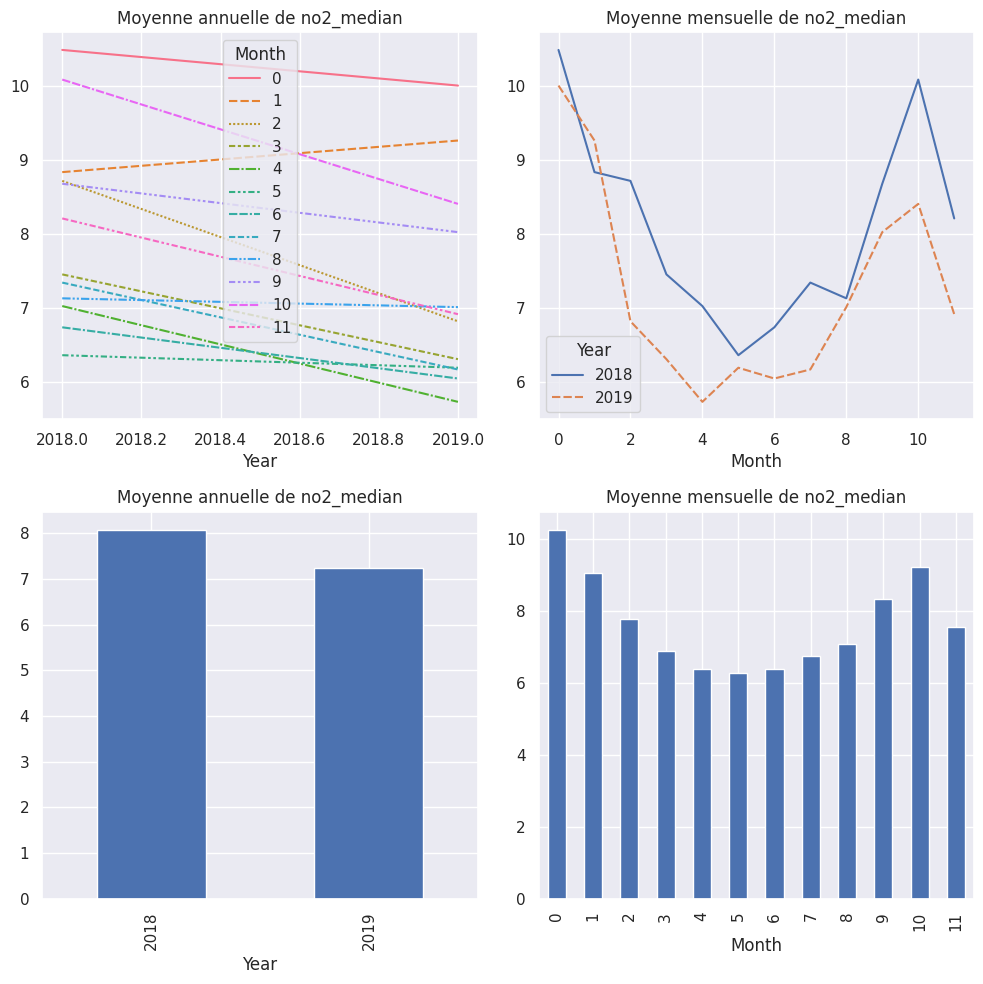

In [73]:
detailed_plot(data, 'no2_median')

Ces graphiques montrent une baisse générale de la concentration moyenne annuelle de dioxyde d'azote (NO2) de 2018 à 2019, et une volatilité mensuelle plus marquée en 2019 avec des pics significatifs vers les mois d'avril et de juillet.

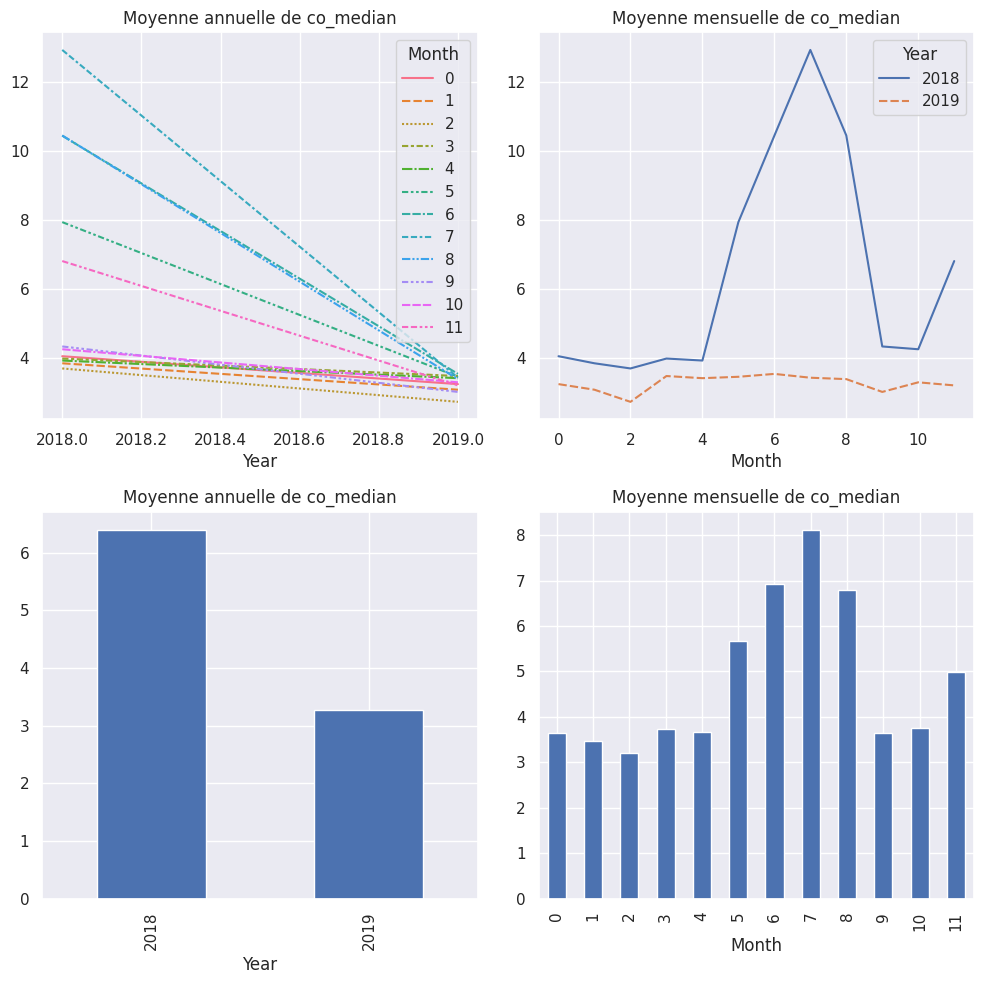

In [74]:
detailed_plot(data, 'co_median')

Les graphiques montrent une diminution conséquente de la concentration moyenne annuelle de monoxyde de carbone (CO) de 2018 à 2019, avec une fluctuation mensuelle prononcée en 2019, notamment une augmentation marquée en avril et octobre.






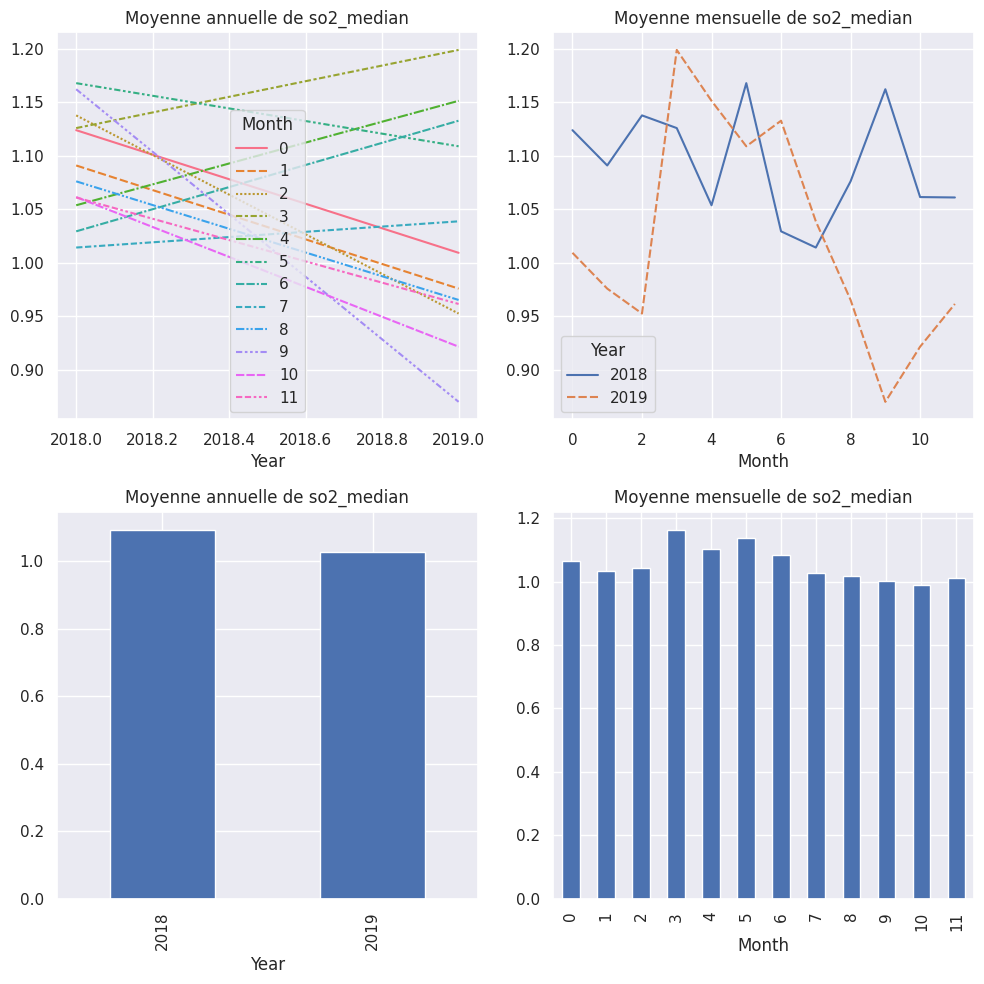

In [75]:
detailed_plot(data, 'so2_median')

L'ensemble de graphiques montre une tendance générale à la baisse des niveaux moyens annuels et mensuels de dioxyde de soufre (SO2) de 2018 à 2019. La variabilité mensuelle est plus marquée en 2019 qu'en 2018, avec des pointes notables durant certains mois.







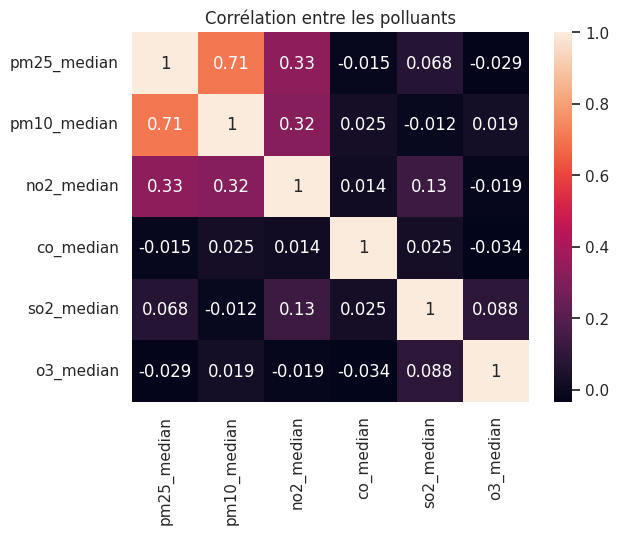

In [76]:
# Calcul de la matrice de corrélation entre plusieurs polluants spécifiés
correlation = data[['pm25_median', 'pm10_median', 'no2_median', 'co_median', 'so2_median', 'o3_median']].corr()
# '.corr()' calcule la corrélation de Pearson par défaut, qui mesure la relation linéaire entre les variables.

# Création d'une heatmap pour visualiser la matrice de corrélation
sns.heatmap(correlation, annot=True)
# Utilise 'sns.heatmap' pour tracer la matrice de corrélation.
# 'annot=True' ajoute des annotations à chaque cellule, affichant les coefficients de corrélation.

# Ajout d'un titre au graphique
plt.title('Corrélation entre les polluants')
plt.savefig('Correlation.png')  # Save the plot as a PNG file

# Affichage du graphique
plt.show()

# La corrélation mesure la relation linéaire entre deux variables; elle varie de -1 à +1.
# Une valeur de 1 indique une corrélation positive parfaite (lorsque l'une augmente, l'autre aussi),
# -1 indique une corrélation négative parfaite (lorsque l'une augmente, l'autre diminue),
#  0 indique aucune corrélation.

### Interpretation des Resultats


*   PM2.5 et PM10 ont une corrélation de 0.71, ce qui est assez élevé, indiquant que les niveaux de ces particules fines tendent à augmenter ou diminuer ensemble. Cela est logique car les PM2.5 sont souvent une sous-catégorie des PM10, donc les sources d'émission pour ces deux types de particules sont souvent similaires

*  NO2 présente une corrélation modérée avec PM2.5 et PM10 (0.33 et 0.32 respectivement), ce qui pourrait suggérer que lorsque les niveaux de NO2 augmentent, il y a une tendance modérée pour l'augmentation des particules fines également.

*   CO présente très peu ou pas de corrélation avec PM2.5, PM10 et NO2, ce qui indique que les variations dans les niveaux de CO ne sont pas directement liées à des changements dans les niveaux de ces autres polluants.


* SO2 a une très faible corrélation positive avec NO2 (0.13), c'est une indication que leurs niveaux ne sont pas fortement liés.

* O3, ou ozone, a des valeurs de corrélation faibles ou négatives avec tous les autres polluants, suggérant qu'il n'y a pas de tendance forte pour que les niveaux d'ozone se déplacent en tandem avec les autres polluants mesurés.

# 3. Prétraitement des Données :
Nettoyer les données en traitant les valeurs manquantes et aberrantes, normaliser les données si nécessaire, et créer de nouvelles variables pouvant
aider à prédire la qualité de l'air (par exemple, indices de pollution, moyennes mobiles).


In [79]:
# Parcourt toutes les colonnes du DataFrame 'data'
for col in data.columns:
  # Définit une liste de mots-clés spécifiques à rechercher dans les noms des colonnes
  for x in ["min", "max", "count", "County", "past_week", "State", "variance"]:
    # Vérifie si le mot-clé spécifique est présent dans le nom de la colonne actuelle
    if x in col:
      # Si le mot-clé est trouvé, supprime la colonne du DataFrame
      data.drop([col], axis=1, inplace=True)


In [80]:
data.drop("dew_median", axis=1, inplace=True)

In [81]:
data.isnull().sum()

Date                                  0
City                                  0
Population Staying at Home            0
Population Not Staying at Home        0
mil_miles                             0
latitude                              0
longitude                             0
o3_median                          1646
pressure_median                     929
pm25_median                         462
humidity_median                     928
temperature_median                  938
no2_median                        12038
wind-speed_median                   950
co_median                         11058
so2_median                        20920
pm10_median                       18631
wind-gust_median                   1379
pp_feat                               0
Weekday                               0
Month                                 0
Year                                  0
dtype: int64

In [82]:
pmean=data["pm25_median"].mean()
data["pm25_median"].fillna(pmean,inplace=True)
pmean=data["o3_median"].mean()
data["o3_median"].fillna(pmean,inplace=True)
pmean=data["no2_median"].mean()
data["no2_median"].fillna(pmean,inplace=True)
pmean=data["co_median"].mean()
data["co_median"].fillna(pmean,inplace=True)
pmean=data["so2_median"].mean()
data["so2_median"].fillna(pmean,inplace=True)
pmean=data["pm10_median"].mean()
data["pm10_median"].fillna(pmean,inplace=True)

pmean=data["wind-gust_median"].mean()
data["wind-gust_median"].fillna(pmean,inplace=True)
pmean=data["wind-speed_median"].mean()
data["wind-speed_median"].fillna(pmean,inplace=True)
pmean=data["temperature_median"].mean()
data["temperature_median"].fillna(pmean,inplace=True)
pmean=data["humidity_median"].mean()
data["humidity_median"].fillna(pmean,inplace=True)
pmean=data["pressure_median"].mean()
data["pressure_median"].fillna(pmean,inplace=True)

In [83]:
data["Population Staying at Home"] =data["Population Staying at Home"].apply(lambda x: x.replace(",", ""))
data["Population Not Staying at Home"] =data["Population Not Staying at Home"].apply(lambda x: x.replace(",", ""))

In [84]:
data.columns

Index(['Date', 'City', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'latitude', 'longitude',
       'o3_median', 'pressure_median', 'pm25_median', 'humidity_median',
       'temperature_median', 'no2_median', 'wind-speed_median', 'co_median',
       'so2_median', 'pm10_median', 'wind-gust_median', 'pp_feat', 'Weekday',
       'Month', 'Year'],
      dtype='object')

# 4. Sélection et Ingénierie des Caractéristiques :

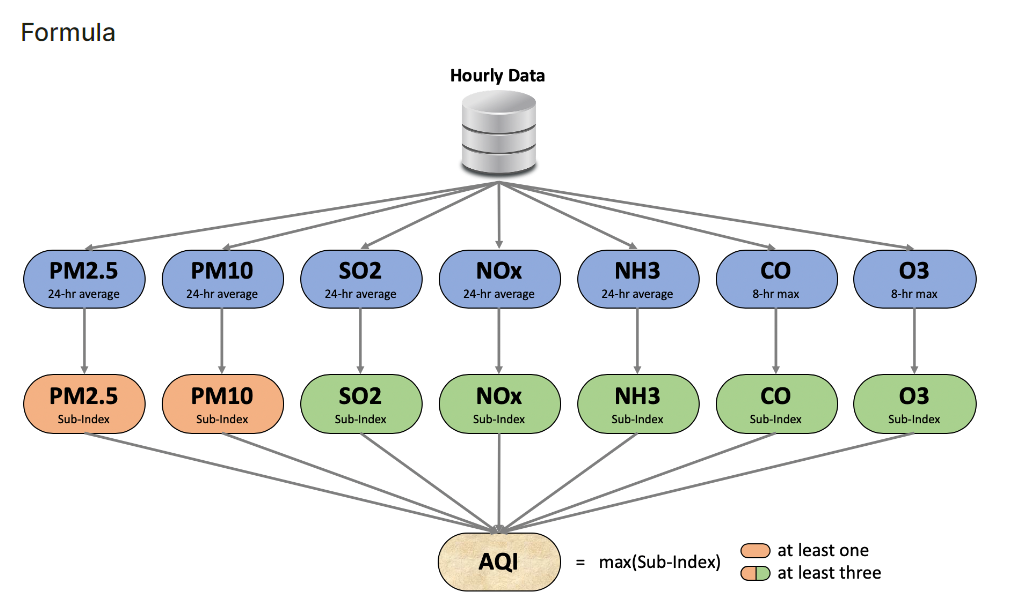

Le calcul de l'Indice de Qualité de l'Air (AQI) utilise 7 mesures : PM2.5, PM10, SO2, NOx, NH3, CO et O3.

Pour les PM2.5, PM10, SO2, NOx et NH3, la valeur moyenne des dernières 24 heures est utilisée, à condition d'avoir au moins 16 valeurs.

Pour le CO et l'O3, la valeur maximale des dernières 8 heures est utilisée.
Chaque mesure est convertie en un Sous-Indice basé sur des groupes prédéfinis.

Parfois, certaines mesures ne sont pas disponibles en raison de l'absence de mesure ou du manque de points de données requis.
L'AQI final est le Sous-Indice maximal, à condition qu'au moins l'un des PM2.5 ou PM10 soit disponible et qu'au moins trois des sept mesures le soient également.


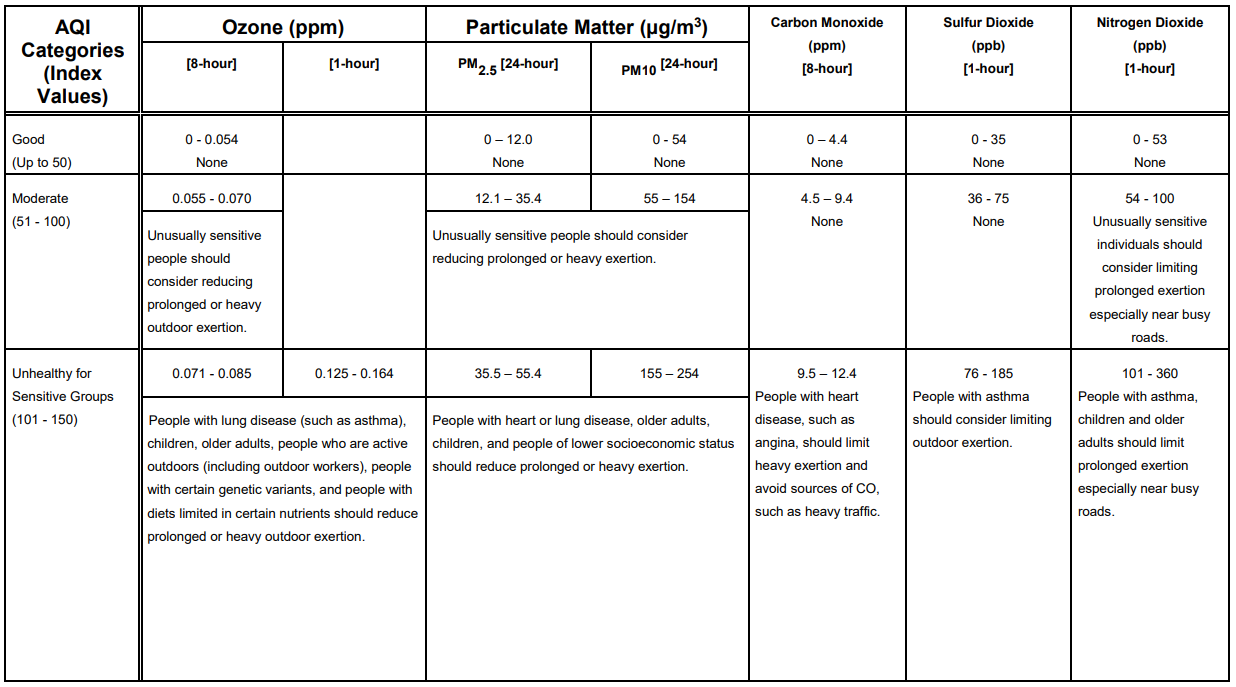

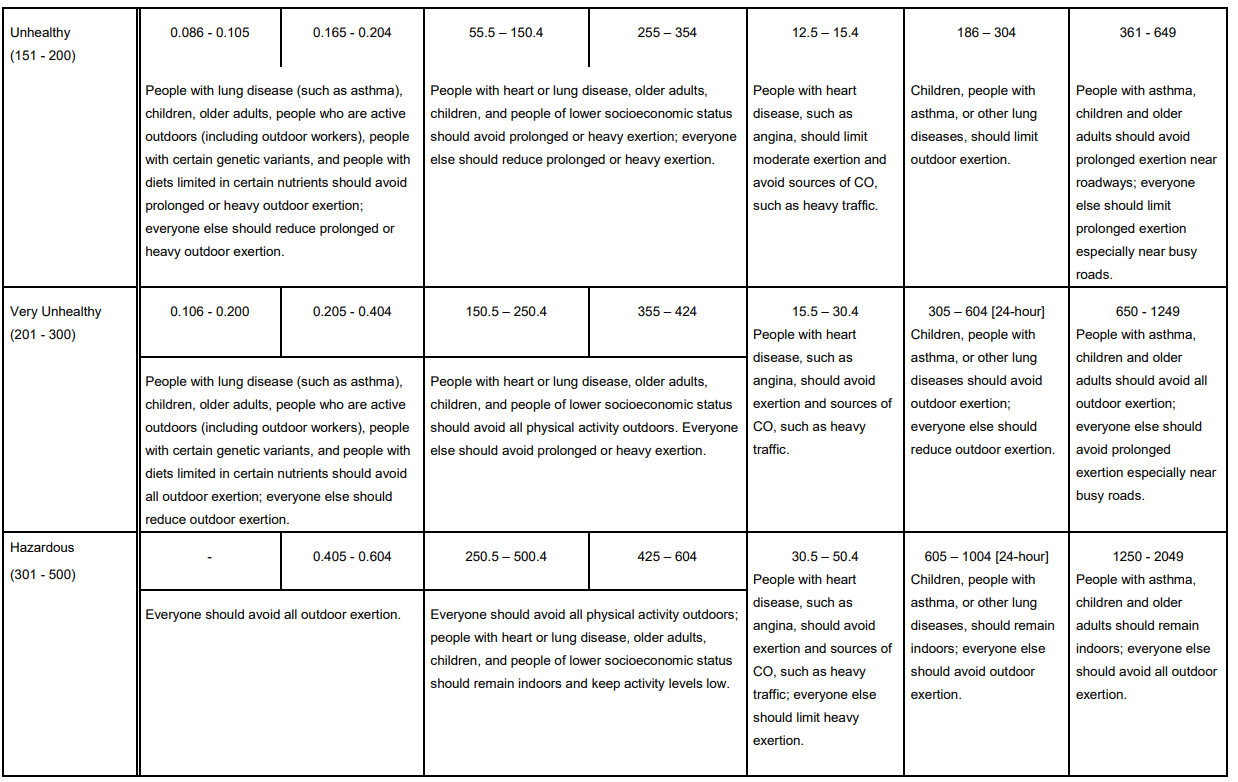

###PM2.5 (Particulate Matter 2.5-micrometer)¶


In [85]:
def calculate_aqi_pm25(concentration):
    if concentration <= 12.0:
        return (50/12) * concentration
    elif concentration <= 35.4:
        return 50 + (100-50)/(35.4-12.1) * (concentration-12.1)
    elif concentration <= 55.4:
        return 100 + (150-100)/(55.4-35.5) * (concentration-35.5)
    elif concentration <= 150.4:
        return 150 + (200-150)/(150.4-55.5) * (concentration-55.5)
    elif concentration <= 250.4:
        return 200 + (300-200)/(250.4-150.5) * (concentration-150.5)
    elif concentration <= 350.4:
        return 300 + (400-300)/(350.4-250.5) * (concentration-250.5)
    elif concentration <= 500.4:
        return 400 + (500-400)/(500.4-350.5) * (concentration-350.5)
    else:
        return 0  # Maximum AQI value


### PM10 (Particulate Matter 10-micrometer)¶


In [86]:
def calculate_aqi_pm10(concentration):
    if concentration <= 54:
        return (50 / 54) * concentration
    elif concentration <= 154:
        return 50 + (100 - 50) / (154 - 55) * (concentration - 55)
    elif concentration <= 254:
        return 100 + (150 - 100) / (254 - 155) * (concentration - 155)
    elif concentration <= 354:
        return 150 + (200 - 150) / (354 - 255) * (concentration - 255)
    elif concentration <= 424:
        return 200 + (300 - 200) / (424 - 355) * (concentration - 355)
    elif concentration <= 504:
        return 300 + (400 - 300) / (504 - 425) * (concentration - 425)
    elif concentration <= 604:
        return 400 + (500 - 400) / (604 - 505) * (concentration - 505)
    else:
        return 0  # Maximum AQI value


### SO2 (Sulphur Dioxide)

In [87]:
def calculate_aqi_so2(concentration):
    if concentration <= 35:
        return (50 / 35) * concentration
    elif concentration <= 75:
        return 50 + (100 - 50) / (75 - 36) * (concentration - 36)
    elif concentration <= 185:
        return 100 + (150 - 100) / (185 - 76) * (concentration - 76)
    elif concentration <= 304:
        return 150 + (200 - 150) / (304 - 186) * (concentration - 186)
    else:
        return 0  # For values above 304, AQI is capped at 500 for simplicity


### CO (Carbon Monoxide)


In [88]:
def calculate_aqi_co(concentration):
    if concentration <= 4.4:
        return (50 / 4.4) * concentration
    elif concentration <= 9.4:
        return 50 + (100 - 50) / (9.4 - 4.5) * (concentration - 4.5)
    elif concentration <= 12.4:
        return 100 + (150 - 100) / (12.4 - 9.5) * (concentration - 9.5)
    elif concentration <= 15.4:
        return 150 + (200 - 150) / (15.4 - 12.5) * (concentration - 12.5)
    elif concentration <= 30.4:
        return 200 + (300 - 200) / (30.4 - 15.5) * (concentration - 15.5)
    elif concentration <= 40.4:
        return 300 + (400 - 300) / (40.4 - 30.5) * (concentration - 30.5)
    elif concentration <= 50.4:
        return 400 + (500 - 400) / (50.4 - 40.5) * (concentration - 40.5)
    else:
        return 0  # Maximum AQI value


### O3 (Ozone or Trioxygen)

In [89]:
def calculate_aqi_o3_8hr(concentration):
    if concentration <= 54:
        return (50 / 54) * concentration
    elif concentration <= 70:
        return 50 + (100 - 50) / (70 - 55) * (concentration - 55)
    elif concentration <= 85:
        return 100 + (150 - 100) / (85 - 71) * (concentration - 71)
    elif concentration <= 105:
        return 150 + (200 - 150) / (105 - 86) * (concentration - 86)
    elif concentration <= 200:
        return 200 + (300 - 200) / (200 - 106) * (concentration - 106)
    else:
        return 0  # Typically, the maximum AQI value for higher concentrations


### NO2

In [90]:
def calculate_aqi_no2(concentration):
    if concentration <= 53:
        return (50 / 53) * concentration
    elif concentration <= 100:
        return 50 + (100 - 50) / (100 - 54) * (concentration - 54)
    elif concentration <= 360:
        return 100 + (150 - 100) / (360 - 101) * (concentration - 101)
    elif concentration <= 649:
        return 150 + (200 - 150) / (649 - 361) * (concentration - 361)
    elif concentration <= 1249:
        return 200 + (300 - 200) / (1249 - 650) * (concentration - 650)
    elif concentration <= 1649:
        return 300 + (400 - 300) / (1649 - 1250) * (concentration - 1250)
    elif concentration <= 2049:
        return 400 + (500 - 400) / (2049 - 1650) * (concentration - 1650)
    else:
        return 0  # Maximum AQI value


In [92]:
data['AQI_PM2.5'] = data['pm25_median'].apply(calculate_aqi_pm25)
data['AQI_PM10'] = data['pm10_median'].apply(calculate_aqi_pm10)
data['AQI_SO2'] = data['so2_median'].apply(calculate_aqi_so2)
data['AQI_CO'] = data['co_median'].apply(calculate_aqi_co)
data['AQI_O3'] = data['o3_median'].apply(calculate_aqi_o3_8hr)
data['AQI_NO2'] = data['no2_median'].apply(calculate_aqi_no2)

# Calculate overall AQI
data['AQI'] = data[['AQI_PM2.5', 'AQI_SO2', 'AQI_PM10', 'AQI_NO2', 'AQI_O3', 'AQI_CO']].max(axis=1)
data

Date           City Population Staying at Home  \
0      2019-01-01    albuquerque                     177171   
1      2019-01-01        atlanta                     283093   
2      2019-01-01         austin                     268732   
3      2019-01-01      baltimore                     191486   
4      2019-01-01          boise                     105237   
...           ...            ...                        ...   
35591  2020-12-11        seattle                     733494   
35592  2020-12-11    springfield                      60167   
35593  2020-12-11  staten island                     159253   
35594  2020-12-11    tallahassee                      76894   
35595  2020-12-11         tucson                     317121   

      Population Not Staying at Home  mil_miles   latitude   longitude  \
0                             499456  19.038463  35.107209 -106.617209   
1                             763811  29.295609  33.760109  -84.402826   
2                             976194  27.286079  30.283333  -97.750641   
3                             409167  12.961132  39.305833  -76.610417   
4                             363293  12.640954  43.604545 -116.202424   
...                              ...        ...        ...         ...   
35591                        1499669  50.982852  47.590794 -122.325714   
35592                         135181   6.221078  39.783158  -89.641842   
35593                         316926  14.491843  40.588571  -74.150000   
35594                         215608   8.184401  30.456000  -84.262500   
35595                         721952  31.191188  32.217037 -110.949815   

       o3_median  pressure_median  pm25_median  ...  Weekday  Month  Year  \
0      20.800000           1018.3         25.0  ...        1      0  2018   
1       8.000000           1018.5         31.0  ...        1      0  2018   
2      11.200000           1021.2         38.0  ...        1      0  2018   
3      19.200000           1014.7         13.0  ...        1      0  2018   
4      17.400000           1034.8         13.0  ...        1      0  2018   
...          ...              ...          ...  ...      ...    ...   ...   
35591   9.600000           1013.8         30.0  ...        4     11  2019   
35592  22.175976           1017.7         39.0  ...        4     11  2019   
35593  10.400000           1015.1         15.0  ...        4     11  2019   
35594   4.900000           1010.4         33.0  ...        4     11  2019   
35595  12.200000           1017.6         30.0  ...        4     11  2019   

        AQI_PM2.5   AQI_PM10   AQI_SO2     AQI_CO     AQI_O3    AQI_NO2  \
0       77.682403  16.666667  1.513268  17.045455  19.259259   4.433962   
1       90.557940  12.962963  0.285714  28.409091   7.407407   6.132075   
2      106.281407  16.357861  1.513268  53.128758  10.370370   7.226384   
3       51.931330   5.555556  1.513268  53.128758  17.777778   5.283019   
4       51.931330   4.629630  1.000000  53.061224  16.111111   7.226384   
...           ...        ...       ...        ...        ...        ...   
35591   88.412017  16.357861  2.142857  32.954545   8.888889  12.264151   
35592  108.793970  16.357861  1.513268  53.128758  20.533312   7.226384   
35593   56.223176  16.357861  1.513268  38.636364   9.629630   9.622642   
35594   94.849785  16.357861  1.513268  22.727273   4.537037   7.226384   
35595   88.412017  25.000000  0.285714  34.090909  11.296296  12.735849   

              AQI  
0       77.682403  
1       90.557940  
2      106.281407  
3       53.128758  
4       53.061224  
...           ...  
35591   88.412017  
35592  108.793970  
35593   56.223176  
35594   94.849785  
35595   88.412017  

[35596 rows x 29 columns]

In [93]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

data["Checks"] = (data["AQI_PM2.5"] > 0).astype(int) + \
                (data["AQI_PM10"] > 0).astype(int) + \
                (data["AQI_SO2"] > 0).astype(int) + \
                (data["AQI_NO2"] > 0).astype(int) + \
                (data["AQI_CO"] > 0).astype(int) + \
                (data["AQI_O3"] > 0).astype(int)

data["AQI_calculated"] = round(data[["AQI_PM2.5", "AQI_PM10", "AQI_SO2",
                                 "AQI_NO2", "AQI_CO", "AQI_O3"]].max(axis = 1))
data.loc[data["AQI_PM2.5"] + data["AQI_PM10"] <= 0, "AQI_calculated"] = np.NaN
data.loc[data.Checks < 3, "AQI_calculated"] = np.NaN

data["AQI_bucket_calculated"] = data["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
data[~data.AQI_calculated.isna()].head(13)

Date         City Population Staying at Home  \
0   2019-01-01  albuquerque                     177171   
1   2019-01-01      atlanta                     283093   
2   2019-01-01       austin                     268732   
3   2019-01-01    baltimore                     191486   
4   2019-01-01        boise                     105237   
5   2019-01-01       boston                     264296   
6   2019-01-01     brooklyn                     964005   
7   2019-01-01    charlotte                     263196   
8   2019-01-01      chicago                    1396803   
9   2019-01-01     columbia                      89669   
10  2019-01-01     columbus                     321012   
11  2019-01-01       dallas                     647418   
12  2019-01-01       denver                     208299   

   Population Not Staying at Home   mil_miles   latitude   longitude  \
0                          499456   19.038463  35.107209 -106.617209   
1                          763811   29.295609  33.760109  -84.402826   
2                          976194   27.286079  30.283333  -97.750641   
3                          409167   12.961132  39.305833  -76.610417   
4                          363293   12.640954  43.604545 -116.202424   
5                          540489   17.221880  42.351282  -71.062051   
6                         1610930   52.130628  40.653269  -73.956538   
7                          827361   30.960487  35.196351  -80.828108   
8                         3767856  148.042151  41.858851  -87.676437   
9                          323640   11.010421  34.011818  -81.013333   
10                         985283   32.448846  39.988043  -82.979783   
11                        1982292   63.927709  32.796780  -96.783559   
12                         506003   22.101613  39.744464 -104.911964   

    o3_median  pressure_median  pm25_median  ...   AQI_PM2.5   AQI_PM10  \
0   20.800000           1018.3         25.0  ...   77.682403  16.666667   
1    8.000000           1018.5         31.0  ...   90.557940  12.962963   
2   11.200000           1021.2         38.0  ...  106.281407  16.357861   
3   19.200000           1014.7         13.0  ...   51.931330   5.555556   
4   17.400000           1034.8         13.0  ...   51.931330   4.629630   
5   22.400000           1005.6         21.0  ...   69.098712  16.357861   
6   20.800000           1009.2         38.0  ...  106.281407  16.357861   
7   18.400000           1016.9         21.0  ...   69.098712  16.357861   
8   17.600000           1024.0         27.0  ...   81.974249  12.037037   
9   17.600000           1019.6         34.0  ...   96.995708  16.357861   
10  22.175976           1020.6         22.0  ...   71.244635  16.357861   
11  12.100000           1023.8         33.0  ...   94.849785  16.357861   
12   7.400000           1028.2         42.0  ...  116.331658  12.037037   

     AQI_SO2     AQI_CO     AQI_O3   AQI_NO2         AQI  Checks  \
0   1.513268  17.045455  19.259259  4.433962   77.682403       6   
1   0.285714  28.409091   7.407407  6.132075   90.557940       6   
2   1.513268  53.128758  10.370370  7.226384  106.281407       6   
3   1.513268  53.128758  17.777778  5.283019   53.128758       6   
4   1.000000  53.061224  16.111111  7.226384   53.061224       6   
5   2.142857  22.727273  20.740741  3.584906   69.098712       6   
6   1.513268  53.128758  19.259259  7.226384  106.281407       6   
7   1.513268   6.818182  17.037037  7.226384   69.098712       6   
8   1.513268  29.545455  16.296296  5.754717   81.974249       6   
9   1.513268  53.128758  16.296296  7.226384   96.995708       6   
10  1.513268  53.128758  20.533312  2.641509   71.244635       6   
11  1.513268  53.128758  11.203704  7.226384   94.849785       6   
12  2.285714  21.590909   6.851852  5.660377  116.331658       6   

    AQI_calculated  AQI_bucket_calculated  
0             78.0           Satisfactory  
1             91.0           Satisfactory  
2            106.0               Moderate  
3       

In [94]:
data[~data.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()


AQI_bucket_calculated
Satisfactory    23967
Moderate        10744
Good              801
Poor               69
Very Poor           9
Severe              6
Name: count, dtype: int64

# 5. Construction des Modèles :

In [95]:
X = data[['pm25_median', 'o3_median', 'no2_median', 'co_median', 'so2_median', 'pm10_median']]
y = data['AQI']  # La colonne 'AQI' est la variable cible qui représente l'indice de qualité de l'air.

# Division de l'ensemble de données en 80% pour l'entraînement et 20% pour le test afin de valider la performance des modèles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("\nShapes of the sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of the sets:
X_train shape: (28476, 6)
X_test shape: (7120, 6)
y_train shape: (28476,)
y_test shape: (7120,)


Regression Linéaire

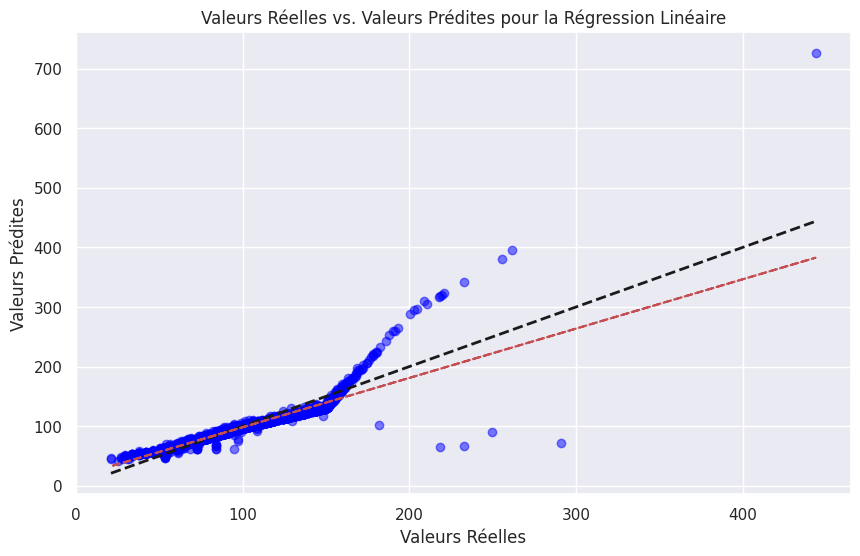

R2: 0.88
MSE: 109.73
RMSE: 109.73
MAE: 6.21


In [120]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Entraînement du modèle de régression linéaire

# Réalisation des prédictions
y_pred = lr_model.predict(X_test)

# Tracé des valeurs réelles par rapport aux valeurs prédites
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  # Points réels vs prédits
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ligne de prédiction parfaite
plt.title('Valeurs Réelles vs. Valeurs Prédites pour la Régression Linéaire')  # Titre du graphique
plt.xlabel('Valeurs Réelles')  # Nom de l'axe des abscisses
plt.ylabel('Valeurs Prédites')  # Nom de l'axe des ordonnées

# Ajout d'une ligne de tendance
z = np.polyfit(y_test, y_pred, 1)  # Calcul des coefficients de la ligne de tendance
p = np.poly1d(z)  # Création de l'objet polynomial
plt.plot(y_test,p(y_test),"r--")  # Tracé de la ligne de tendance
plt.savefig('LinearRegression.png')  # Enregistrement du graphique sous forme de fichier PNG

plt.show()  # Affichage du graphique


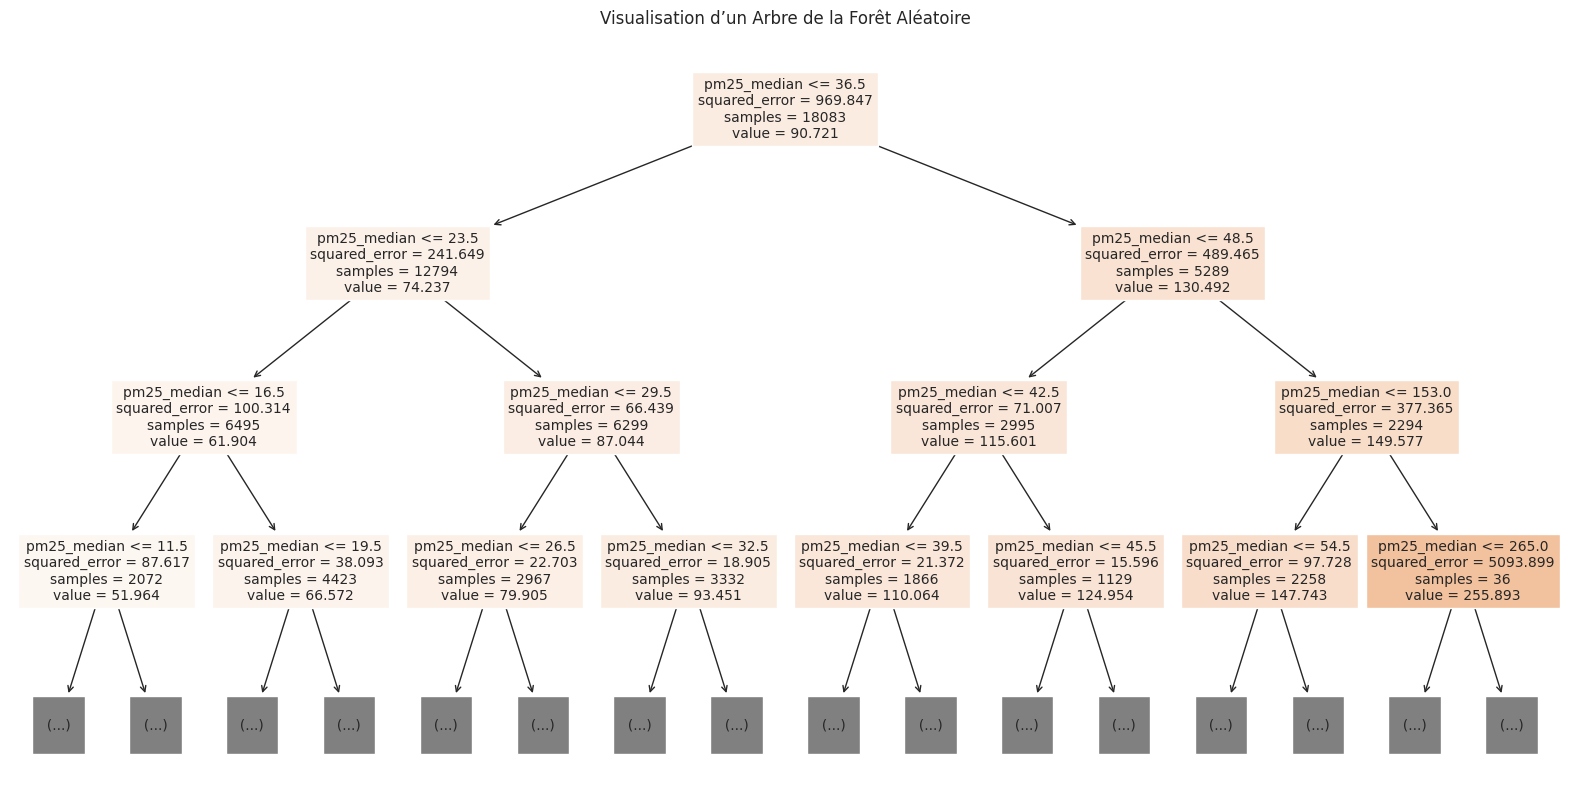

In [97]:
# En supposant que X_train et y_train sont déjà définis et prétraités
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
# Initialisation d'un modèle de régression de forêt aléatoire avec 150 arbres et un état aléatoire fixé pour la reproductibilité.

rf_model.fit(X_train, y_train)
# Entraînement du modèle sur les données d'entraînement.

# Sélection d'un arbre dans la forêt aléatoire. Ici, nous sélectionnons le premier arbre.
estimator = rf_model.estimators_[0]
# Extraction du premier estimateur d'arbre de décision du modèle de forêt aléatoire entraîné.

# Représentation graphique de l'arbre
plt.figure(figsize=(20,10))  # Définition de la taille de la figure (largeur, hauteur) en pouces.
plot_tree(estimator,
          filled=True,  # Coloration des nœuds en fonction de la classe majoritaire.
          feature_names=X_train.columns,  # Utilisation des noms de caractéristiques pour une meilleure lisibilité.
          max_depth=3,  # Limitation de la profondeur de l'arbre pour une interprétation plus facile.
          fontsize=10)  # Définition de la taille de la police pour une meilleure lisibilité.
plt.title('Visualisation d’un Arbre de la Forêt Aléatoire')  # Ajout d'un titre au graphique.
plt.savefig('RandomForestRegressor.png')  # Enregistrement du graphique sous forme de fichier PNG.
plt.show()  # Affichage du graphique.


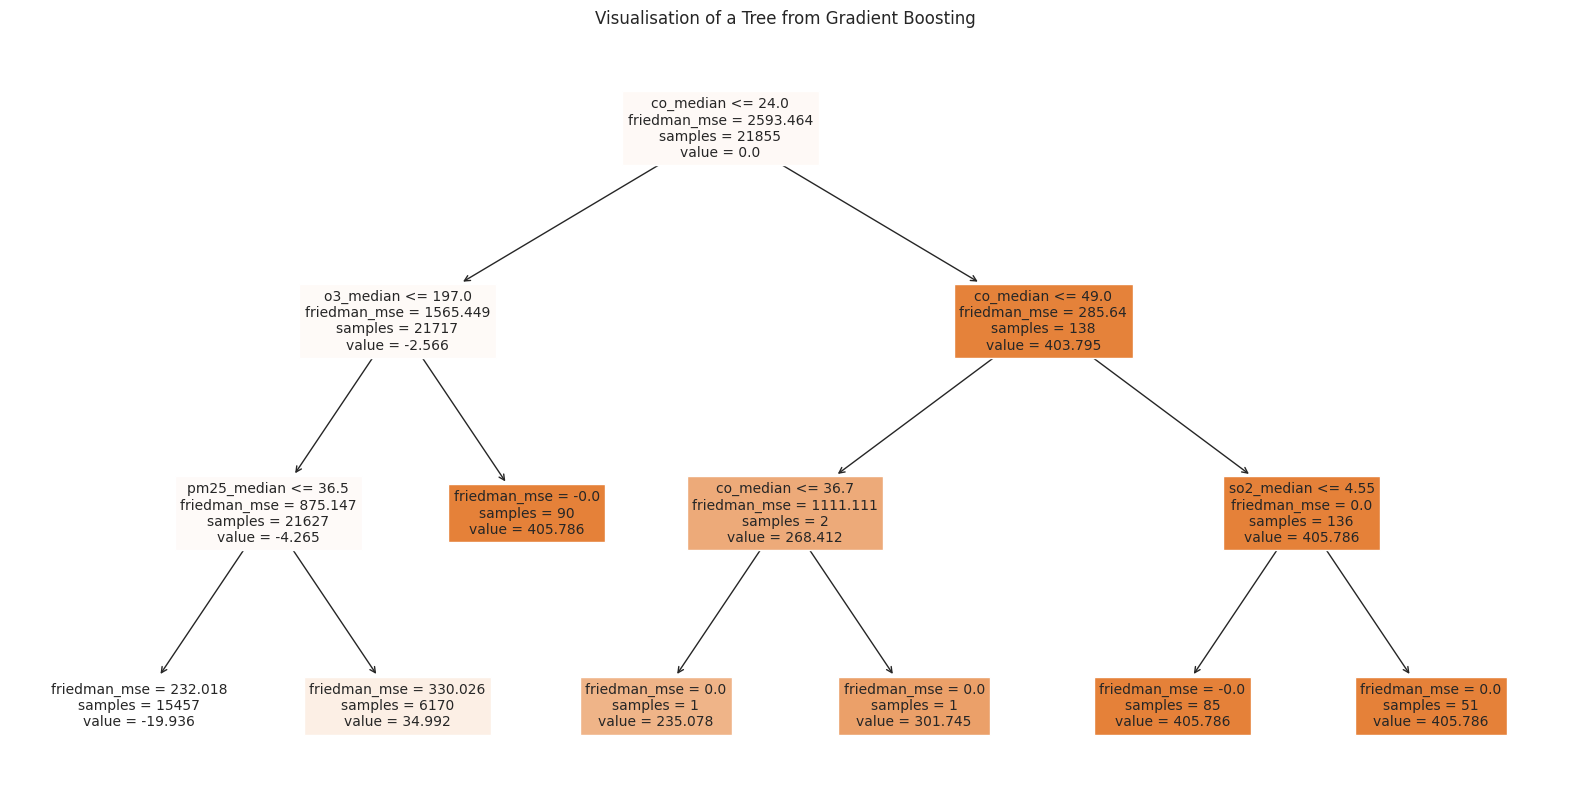

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Select one tree from the gradient boosting model. Here, we select the first tree in the first boosting stage.
estimator = gb_model.estimators_[0, 0]  # Access the first estimator of the first stage

# Plot the tree
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
plot_tree(estimator,
          filled=True,  # Color the nodes based on the improvement they bring
          feature_names=X_train.columns,  # Provide feature names for better readability
          max_depth=3,  # Limit depth of tree to make it more interpretable
          fontsize=10)  # Set font size for readability
plt.title('Visualisation of a Tree from Gradient Boosting')
plt.savefig('GradientBoostingRegressor.png')  # Save the plot as a PNG file

plt.show()


# 6. Évaluation et Sélection du Modèle :

Régression Linéaire - MSE du test : 109.7344, R^2 du test : 0.8838
Régression Linéaire - MSE moyen de la CV : 189.8048, R^2 moyen de la CV : 0.8251
------------------------------
Régression de Forêt Aléatoire - MSE du test : 16.1053, R^2 du test : 0.9829
Régression de Forêt Aléatoire - MSE moyen de la CV : 32.2929, R^2 moyen de la CV : 0.9686
------------------------------
Régression par Gradient Boosting - MSE du test : 3.3577, R^2 du test : 0.9964
Régression par Gradient Boosting - MSE moyen de la CV : 25.7568, R^2 moyen de la CV : 0.9760
------------------------------


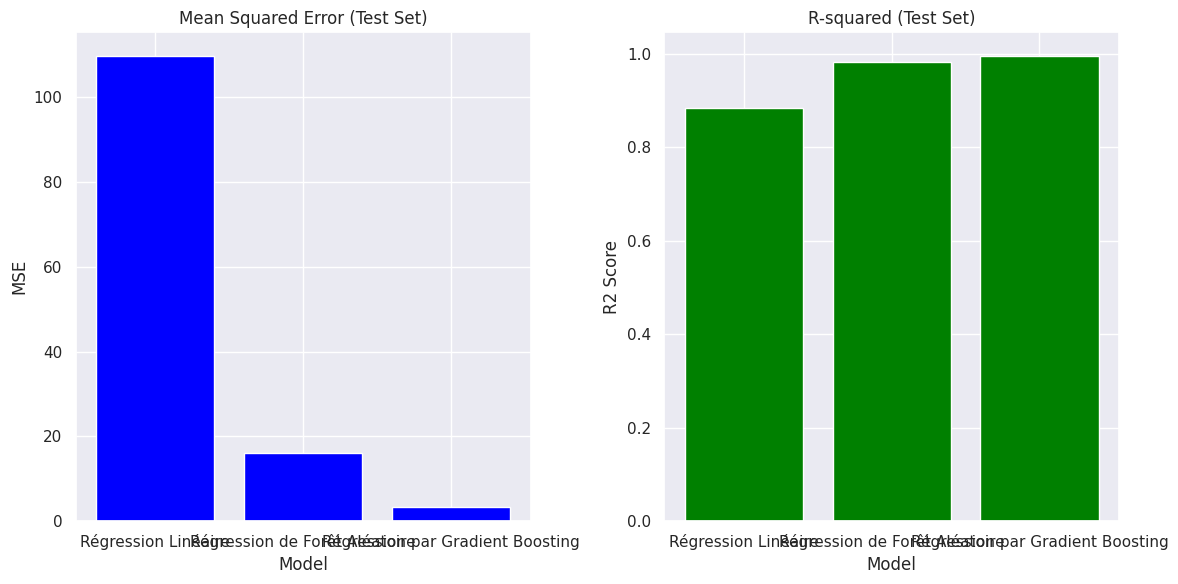

In [117]:
lr_model = LinearRegression()

# Initialisation du régresseur de forêt aléatoire.
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Initialisation du régresseur par gradient boosting.
gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)

# Liste pour stocker les modèles.
models = [('Régression Linéaire', lr_model),
          ('Régression de Forêt Aléatoire', rf_model),
          ('Régression par Gradient Boosting', gb_model)]

# Prepare lists to store the results for visualizing later
model_names = ['Régression Linéaire', 'Régression de Forêt Aléatoire', 'Régression par Gradient Boosting']
test_mses = []
test_r2s = []
cv_mses = []
cv_r2s = []

# Entraînement et évaluation des modèles
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate test MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    test_mses.append(mse)
    test_r2s.append(r2)

    # Calculate cross-validation MSE and R2
    cv_scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_mses.append(-np.mean(cv_scores_mse))
    cv_r2s.append(np.mean(cv_scores_r2))

    print(f"{name} - MSE du test : {mse:.4f}, R^2 du test : {r2:.4f}")
    print(f"{name} - MSE moyen de la CV : {-np.mean(cv_scores_mse):.4f}, R^2 moyen de la CV : {np.mean(cv_scores_r2):.4f}")
    print('---' * 10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Test MSE
ax1.bar(model_names, test_mses, color='blue')
ax1.set_title('Mean Squared Error (Test Set)')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Model')

# Plotting Test R2
ax2.bar(model_names, test_r2s, color='green')
ax2.set_title('R-squared (Test Set)')
ax2.set_ylabel('R2 Score')
ax2.set_xlabel('Model')

plt.tight_layout()
plt.show()



## Linear regression

Améliorations de la Régression Linéaire : Regularisation
Des méthodes de régularisation telles que Lasso (régularisation L1) et Ridge (régularisation L2) peuvent contribuer à prévenir le surajustement en pénalisant les coefficients importants du modèle. Ces méthodes sont particulièrement utiles si l'ensemble de données présente de la multicollinéarité ou si vous travaillez avec des données de haute dimension.

In [106]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=2.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # Smaller alpha can yield denser coefficient (less zero entries)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge - MSE:", mse_ridge, "R²:", r2_ridge)
print("Lasso - MSE:", mse_lasso, "R²:", r2_lasso)


Ridge - MSE: 109.73444591182492 R²: 0.88377578835412
Lasso - MSE: 109.73310204230921 R²: 0.8837772117009435


Le modèle de régression linéaire ne fournit pas de résultats satisfaisants même après des tentatives d'optimisation,
Donc en peux utiliser la Régression par Vecteurs de Support (SVR) comme solution. La SVR est capable de saisir des relations non linéaires complexes entre les données, ce qui s'avère utile lorsque la relation entre les variables indépendantes et la variable dépendante ne peut être décrite adéquatement par une fonction linéaire.

In [111]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Using a pipeline to scale features and fit the SVR model
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1))
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("SVR - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)), "R²:", r2_score(y_test, y_pred_svr), "MSE:", mean_squared_error(y_test, y_pred_svr))


SVR - RMSE: 3.5118573692620423 R²: 0.9869374678542056 MSE: 12.333142182040111


## Random forest

In [121]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'max_depth': [10, 20, 30],  # Maximum number of levels in tree
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_grid.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best= mean_absolute_error(y_test, y_pred)
print("Best Random Forest - MSE:", mse_best)
print("Best Random Forest - RMSE:", rmse_best)
print("Best Random Forest - MAE:", mae_best)
print("Best Random Forest - R²:", r2_best)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



Best Random Forest - MSE: 19.01908440662602
Best Random Forest - RMSE: 4.361087525678202
Best Random Forest - MAE: 6.20742089773344
Best Random Forest - R²: 0.9798561147047414


L'analyse des résultats obtenus avec le modèle de Forêt Aléatoire (Random Forest) révèle une certaine variation entre les résultats de l'évaluation sur le jeu de test et ceux obtenus par la validation croisée (CV). Pour le modèle simple, l'Erreur Quadratique Moyenne (MSE) du test est de 16.1053 et le coefficient de détermination (R²) est de 0.9829, indiquant une précision relativement élevée. Cependant, les résultats moyens de la validation croisée montrent un MSE plus élevé de 32.2929 et un R² de 0.9686, ce qui suggère que le modèle peut ne pas être aussi performant sur des données non vues.

## Gradient Boosting Optimisation des Hyperparamètres
Le Gradient Boosting peut être considérablement amélioré en ajustant ses paramètres. Parmi les paramètres importants figurent le nombre d'estimateurs `(n_estimators)`, le taux d'apprentissage `(learning_rate)`, la profondeur maximale des arbres `(max_depth)` et la proportion de l'échantillon `(subsample)`.

In [122]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres pour l'optimisation du régresseur Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150, 200],  # Nombre d'arbres à construire (plus il y en a, plus le modèle peut être robuste mais risque de surapprentissage)
    'learning_rate': [0.1, 0.05, 0.01],  # Taux d'apprentissage réduit la contribution de chaque arbre (un taux plus faible nécessite plus d'arbres)
    'max_depth': [3, 5, 7],  # Profondeur maximale de chaque arbre (une profondeur plus élevée peut permettre au modèle de capturer plus de détails mais risque de surapprentissage)
    'subsample': [1.0, 0.9, 0.8]  # Proportion d'instances à utiliser pour l'apprentissage de chaque arbre (moins de 1.0 ajoute plus de variance et peut aider contre le surapprentissage)
}

# Création de l'objet GridSearchCV pour trouver les meilleurs paramètres
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42),  # Utilisation de GradientBoostingRegressor avec un état aléatoire pour la reproductibilité
                              gb_param_grid,  # Grille de paramètres définie précédemment
                              cv=3,  # Nombre de folds pour la validation croisée
                              scoring='neg_mean_squared_error',  # Critère d'évaluation pour optimiser les modèles (ici, l'erreur quadratique moyenne négative pour maximiser la fonction de score)
                              n_jobs=-1,  # Utilisation de tous les cœurs disponibles pour paralléliser les calculs
                              verbose=1)  # Affichage des messages durant l'optimisation
gb_grid_search.fit(X_train, y_train)  # Ajustement de GridSearchCV sur les données d'entraînement
best_gb = gb_grid_search.best_estimator_  # Sélection du meilleur modèle trouvé par GridSearchCV

# Évaluation du meilleur modèle Gradient Boosting trouvé
y_pred_gb_best = best_gb.predict(X_test)  # Prédiction sur les données de test
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)  # Calcul de l'erreur quadratique moyenne sur les données de test
r2_gb_best = r2_score(y_test, y_pred_gb_best)  # Calcul du coefficient de détermination R² sur les données de test
rmse_gb_best = np.sqrt(mse_gb_best)

mae_gb_best = mean_absolute_error(y_test, y_pred)

# Affichage des résultats de l'évaluation
print("GradientBoostingRegressor MSE:", mse_gb_best)
print("GradientBoostingRegressor RMSE:", rmse_gb_best)
print("GradientBoostingRegressor MAE:", mae_gb_best)
print("GradientBoostingRegressor R²:", r2_gb_best)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest - MSE: 1.7289034343250569
Best Random Forest - RMSE: 1.3148777259977662
Best Random Forest - MAE: 6.20742089773344
Best Random Forest - R²: 0.9981688481041974


# Comparaison

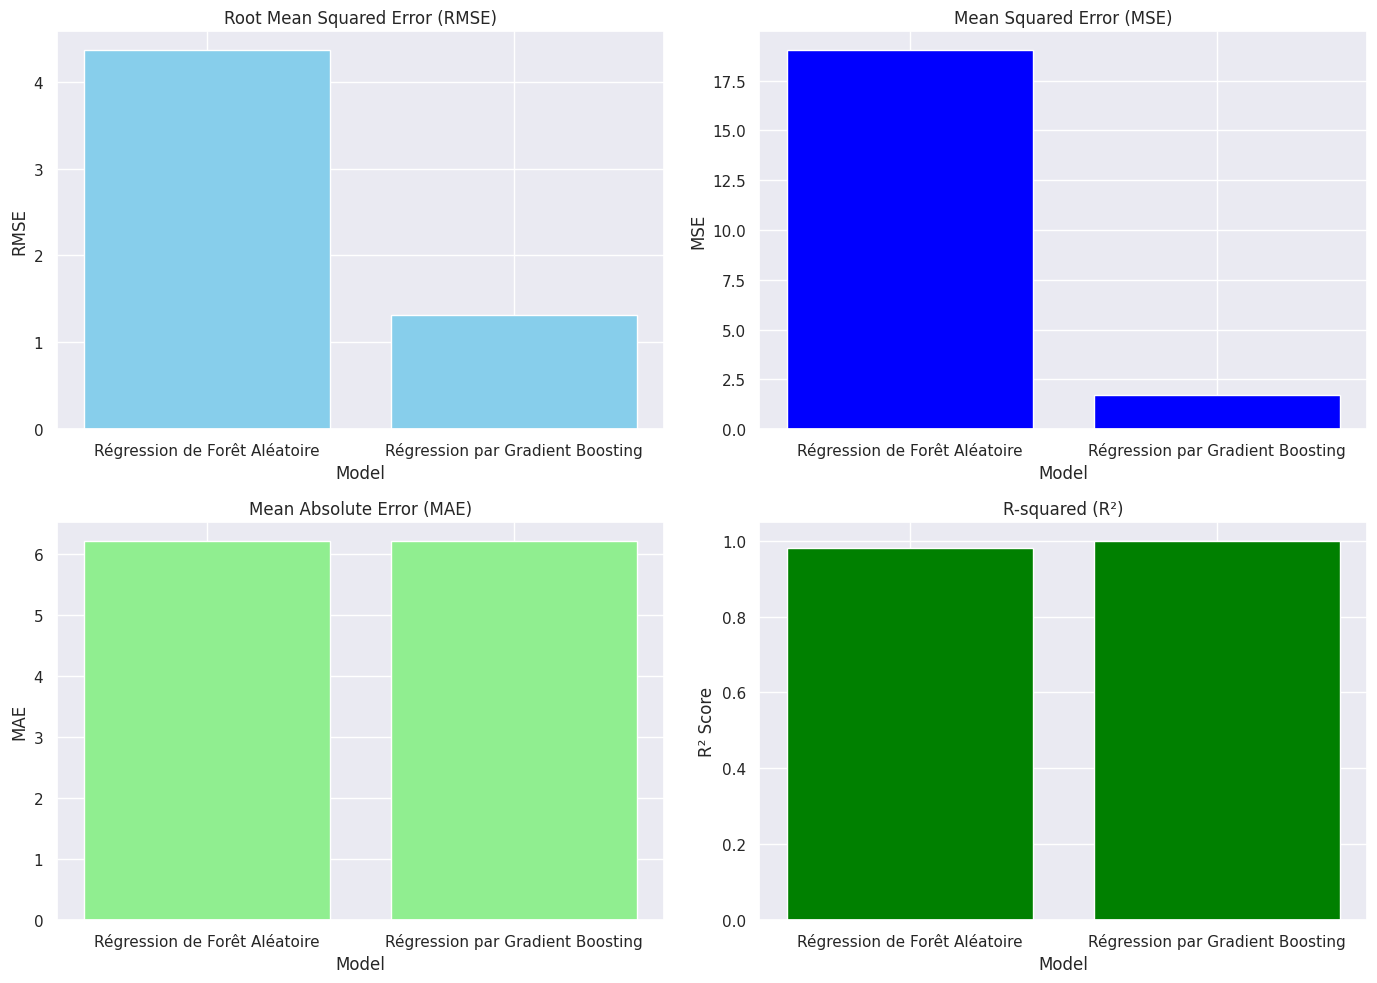

In [124]:
# Prepare lists to store the results for visualizing later
model_names = ['Régression de Forêt Aléatoire', 'Régression par Gradient Boosting']
rmses = [rmse_best,rmse_gb_best]
mses = [mse_best,mse_gb_best]
maes = [mae_best,mae_gb_best]
r2s = [r2_best,r2_gb_best]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the size as needed

# Plotting RMSE
axs[0, 0].bar(model_names, rmses, color='skyblue')
axs[0, 0].set_title('Root Mean Squared Error (RMSE)')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].set_xlabel('Model')

# Plotting MSE
axs[0, 1].bar(model_names, mses, color='blue')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].set_xlabel('Model')

# Plotting MAE
axs[1, 0].bar(model_names, maes, color='lightgreen')
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].set_xlabel('Model')

# Plotting R²
axs[1, 1].bar(model_names, r2s, color='green')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_ylabel('R² Score')
axs[1, 1].set_xlabel('Model')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



*   **RMSE:** La Régression par Gradient Boosting montre une erreur quadratique moyenne racinée (RMSE) significativement inférieure à celle de la Régression de Forêt Aléatoire, indiquant de meilleures prédictions en moyenne pour le premier modèle.

*   **MSE:** la Régression par Gradient Boosting est beaucoup plus basse que celle de la Régression de Forêt Aléatoire, suggérant une plus grande précision dans les prédictions du modèle Gradient Boosting.

* **MAE:** la Régression par Gradient Boosting présente également une valeur inférieure, ce qui implique que les prédictions sont en moyenne plus proches des valeurs réelles par rapport à la Régression de Forêt Aléatoire.
* **R²:** les deux modèles affichent des scores élevés, avec un léger avantage pour la Régression par Gradient Boosting.

Cela suggère que, pour ces données et selon ces métriques, **la Régression par Gradient Boosting semble être plus performante que la Régression de Forêt Aléatoire.**

In [113]:
# from joblib import dump
# models = [('Regression Linear', lr_model),
#           ('Régression de Forêt Aléatoire', rf_model),
#           ('Régression par Gradient Boosting', gb_grid_search)]

# for name, model in models:
#     dump(model, f'{name.replace(" ", "_")}.joblib')

# Download models to use for visualization